In [57]:
# import zipfile
import xarray as xr
# import io
# import re
import numpy as np

from datetime import datetime, timedelta
import matplotlib.pyplot as plt


In [58]:
path = r"..\data\raw\RSS_WindSat_TB_L1C_r72424_20161231T223354_2016366_V08.0.nc4"

ds = xr.open_dataset(path, engine= 'h5netcdf', decode_times=False, decode_coords='coordinates')

In [60]:
print(ds)

<xarray.Dataset> Size: 2GB
Dimensions:                (ydim_grid: 1440, xdim_grid: 3120, look: 2,
                            frequency_band: 5, polarization_6: 6,
                            polarization_2: 2)
Dimensions without coordinates: ydim_grid, xdim_grid, look, frequency_band,
                                polarization_6, polarization_2
Data variables: (12/17)
    earth_incidence_angle  (ydim_grid, xdim_grid, look, frequency_band) float32 180MB ...
    scan_angle             (ydim_grid, xdim_grid, look, frequency_band) float32 180MB ...
    tb_10                  (polarization_6, look, ydim_grid, xdim_grid) float32 216MB ...
    earth_azimuth_angle    (ydim_grid, xdim_grid, look, frequency_band) float32 180MB ...
    fractional_orbit       (xdim_grid) float64 25kB ...
    fra                    (ydim_grid, xdim_grid, look, frequency_band) float32 180MB ...
    ...                     ...
    pra                    (ydim_grid, xdim_grid, look, frequency_band) float32 180MB ..

In [62]:
ds_swapped = ds.swap_dims({'ydim_grid': 'latitude', 'xdim_grid': 'longitude'})


ValueError: replacement dimension 'latitude' is not a 1D variable along the old dimension 'ydim_grid'

In [65]:
# Create a new longitude grid based on the longitude coordinates
new_longitude_grid = xr.DataArray(ds.longitude.values, dims='longitude')

# Interpolate the data onto the new longitude grid
ds_interpolated = ds.interp(xdim_grid=new_longitude_grid)

# Update longitude coordinate to the new grid
ds_interpolated = ds_interpolated.assign_coords(longitude=new_longitude_grid)

ValueError: different number of dimensions on data and dims: 2 vs 1

In [42]:
lat = np.linspace(-90,90, num = ds.sizes['ydim_grid'])
lon = np.linspace(-180,180, num = ds.sizes['xdim_grid'])
# ds = ds.assign_coords(latitude=lat, longitude=lon)
ds


<xarray.Dataset> Size: 2GB
Dimensions:                (ydim_grid: 1440, xdim_grid: 3120, look: 2,
                            frequency_band: 5, polarization_6: 6,
                            polarization_2: 2, longitude: 3120, latitude: 1440)
Coordinates:
  * longitude              (longitude) float64 25kB -180.0 -179.9 ... 180.0
  * latitude               (latitude) float64 12kB -90.0 -89.87 ... 89.87 90.0
Dimensions without coordinates: ydim_grid, xdim_grid, look, frequency_band,
                                polarization_6, polarization_2
Data variables: (12/15)
    earth_incidence_angle  (ydim_grid, xdim_grid, look, frequency_band) float32 180MB ...
    scan_angle             (ydim_grid, xdim_grid, look, frequency_band) float32 180MB ...
    tb_10                  (polarization_6, look, ydim_grid, xdim_grid) float32 216MB ...
    earth_azimuth_angle    (ydim_grid, xdim_grid, look, frequency_band) float32 180MB ...
    fractional_orbit       (xdim_grid) float64 25kB ...
    fra                    (ydim_grid, xdim_grid, look, frequency_band) float32 180MB ...
    ...                     ...
    pra                    (ydim_grid, xdim_grid, look, frequency_band) float32 180MB ...
    tb_37                  (polarization_6, look, ydim_grid, xdim_grid) float32 216MB ...
    tb_06                  (polarization_2, look, ydim_grid, xdim_grid) float32 72MB ...
    quality_flag           (ydim_grid, xdim_grid, look, frequency_band) int8 45MB ...
    land_fraction_06       (ydim_grid, xdim_grid) float32 18MB ...
    land_fraction_10       (ydim_grid, xdim_grid) float32 18MB ...
Attributes: (12/76)
    Conventions:                                 CF-1.7
    title:                                       RSS WindSat TOA Brightness T...
    version:                                     V08.0
    summary:                                     The dataset contains the Lev...
    references:                                   [1] T. Meissner and F. Went...
    acknowledgement:                             Funded under NASA Grant 80NS...
    ...                                          ...
    build_dmrpp_metadata.build_dmrpp:            3.20.13-184
    build_dmrpp_metadata.bes:                    3.20.13-184
    build_dmrpp_metadata.libdap:                 libdap-3.20.11-59
    build_dmrpp_metadata.configuration:          \n# TheBESKeys::get_as_confi...
    build_dmrpp_metadata.invocation:             build_dmrpp -c /tmp/bes_conf...
    history_json:                                [{"$schema":"https:\/\/harmo...

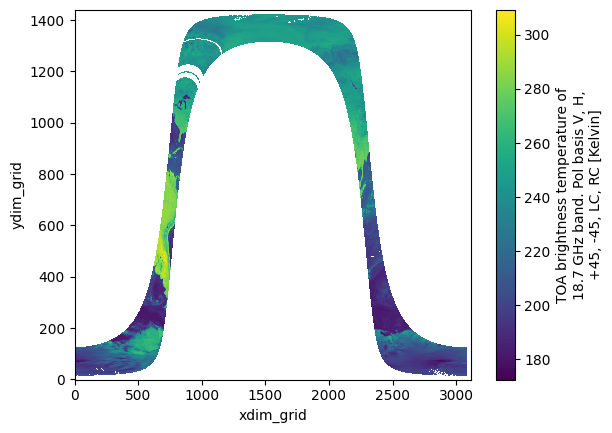

In [38]:
ds.tb_18.sel(polarization_6 = 0, look = 0).plot()

In [46]:
# Asign new coordinates to the valiables, lat and long, besides the original ydim_gird and xdim_gird

kaH = ds.tb_18.sel(polarization_6 = 1, look =0)

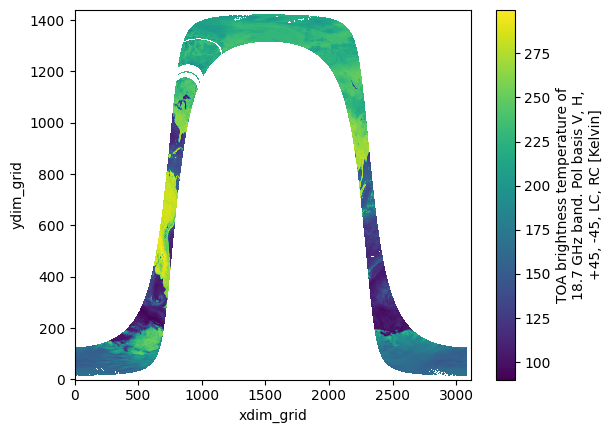

In [49]:
kaH.plot()

In [80]:
# 0.0 - 0.5 -> ascending swath, 0.5- 1.0 -> descending swath

# Lets make fractional_orbit a dimention:
ds = ds.assign_coords(fractional_orbit= ds.fractional_orbit)
# dds = ds[ds.fractional_orbit >0.5]
# ds.fractional_orbit

<xarray.Dataset> Size: 2GB
Dimensions:                (ydim_grid: 1440, xdim_grid: 3120, look: 2,
                            frequency_band: 5, polarization_6: 6,
                            polarization_2: 2)
Coordinates:
    fractional_orbit       (xdim_grid) float64 25kB 2.6e-05 7.8e-05 ... 1.002
Dimensions without coordinates: ydim_grid, xdim_grid, look, frequency_band,
                                polarization_6, polarization_2
Data variables: (12/16)
    earth_incidence_angle  (ydim_grid, xdim_grid, look, frequency_band) float32 180MB ...
    scan_angle             (ydim_grid, xdim_grid, look, frequency_band) float32 180MB ...
    tb_10                  (polarization_6, look, ydim_grid, xdim_grid) float32 216MB ...
    earth_azimuth_angle    (ydim_grid, xdim_grid, look, frequency_band) float32 180MB ...
    fra                    (ydim_grid, xdim_grid, look, frequency_band) float32 180MB ...
    time                   (ydim_grid, xdim_grid, look, frequency_band) float64 359MB ...
    ...                     ...
    pra                    (ydim_grid, xdim_grid, look, frequency_band) float32 180MB ...
    tb_37                  (polarization_6, look, ydim_grid, xdim_grid) float32 216MB ...
    tb_06                  (polarization_2, look, ydim_grid, xdim_grid) float32 72MB ...
    quality_flag           (ydim_grid, xdim_grid, look, frequency_band) int8 45MB ...
    land_fraction_06       (ydim_grid, xdim_grid) float32 18MB ...
    land_fraction_10       (ydim_grid, xdim_grid) float32 18MB ...
Attributes: (12/76)
    Conventions:                                 CF-1.7
    title:                                       RSS WindSat TOA Brightness T...
    version:                                     V08.0
    summary:                                     The dataset contains the Lev...
    references:                                   [1] T. Meissner and F. Went...
    acknowledgement:                             Funded under NASA Grant 80NS...
    ...                                          ...
    build_dmrpp_metadata.build_dmrpp:            3.20.13-184
    build_dmrpp_metadata.bes:                    3.20.13-184
    build_dmrpp_metadata.libdap:                 libdap-3.20.11-59
    build_dmrpp_metadata.configuration:          \n# TheBESKeys::get_as_confi...
    build_dmrpp_metadata.invocation:             build_dmrpp -c /tmp/bes_conf...
    history_json:                                [{"$schema":"https:\/\/harmo...

In [77]:
ds

<xarray.Dataset> Size: 2GB
Dimensions:                (ydim_grid: 1440, xdim_grid: 3120, look: 2,
                            frequency_band: 5, polarization_6: 6,
                            polarization_2: 2)
Coordinates:
    fractional_orbit       (xdim_grid) float64 25kB 2.6e-05 7.8e-05 ... 1.002
Dimensions without coordinates: ydim_grid, xdim_grid, look, frequency_band,
                                polarization_6, polarization_2
Data variables: (12/16)
    earth_incidence_angle  (ydim_grid, xdim_grid, look, frequency_band) float32 180MB ...
    scan_angle             (ydim_grid, xdim_grid, look, frequency_band) float32 180MB ...
    tb_10                  (polarization_6, look, ydim_grid, xdim_grid) float32 216MB ...
    earth_azimuth_angle    (ydim_grid, xdim_grid, look, frequency_band) float32 180MB ...
    fra                    (ydim_grid, xdim_grid, look, frequency_band) float32 180MB ...
    time                   (ydim_grid, xdim_grid, look, frequency_band) float64 359MB ...
    ...                     ...
    pra                    (ydim_grid, xdim_grid, look, frequency_band) float32 180MB ...
    tb_37                  (polarization_6, look, ydim_grid, xdim_grid) float32 216MB ...
    tb_06                  (polarization_2, look, ydim_grid, xdim_grid) float32 72MB ...
    quality_flag           (ydim_grid, xdim_grid, look, frequency_band) int8 45MB ...
    land_fraction_06       (ydim_grid, xdim_grid) float32 18MB ...
    land_fraction_10       (ydim_grid, xdim_grid) float32 18MB ...
Attributes: (12/76)
    Conventions:                                 CF-1.7
    title:                                       RSS WindSat TOA Brightness T...
    version:                                     V08.0
    summary:                                     The dataset contains the Lev...
    references:                                   [1] T. Meissner and F. Went...
    acknowledgement:                             Funded under NASA Grant 80NS...
    ...                                          ...
    build_dmrpp_metadata.build_dmrpp:            3.20.13-184
    build_dmrpp_metadata.bes:                    3.20.13-184
    build_dmrpp_metadata.libdap:                 libdap-3.20.11-59
    build_dmrpp_metadata.configuration:          \n# TheBESKeys::get_as_confi...
    build_dmrpp_metadata.invocation:             build_dmrpp -c /tmp/bes_conf...
    history_json:                                [{"$schema":"https:\/\/harmo...